# Metadata explore

In this notebook, we use the `allDatasets` dataset from ERDDAP to examine the primary metadata of all glider missions

In [1]:
import utils
import datetime
from tqdm.notebook import tqdm

In [2]:
e = utils.init_erddap()

# Fetch dataset list
e.response = "csv"
e.dataset_id = "allDatasets"
df_datasets = e.to_pandas(parse_dates=['minTime (UTC)', 'maxTime (UTC)'])

print(f"found {len(df_datasets)} datasets")

found 204 datasets


In [3]:
# drop the allDatasets row and make the datasetID the index for easier reading
df_datasets.set_index("datasetID", inplace=True)
df_datasets.drop("allDatasets", inplace=True)

In [4]:
df_datasets.head()

,accessible,institution,dataStructure,cdm_data_type,class,title,minLongitude (degrees_east),maxLongitude (degrees_east),longitudeSpacing (degrees_east),minLatitude (degrees_north),...,fgdc,iso19115,metadata,sourceUrl,infoUrl,rss,email,testOutOfDate,outOfDate,summary
datasetID,,,,,,,,,,,,,,,,,,,,,
delayed_SEA068_M27,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Aster68-20220727T1709,19.901650,19.984983,NaN,58.199733,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,NaN,NaN,Summer 2022 Eastern Gotland Basin trials
nrt_SEA068_M27,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Aster68-20220727T1709,19.901883,19.982300,NaN,58.199850,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,NaN,NaN,Summer 2022 Eastern Gotland Basin trials
delayed_SEA076_M8,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Fibbla76-20221005T1503,15.736800,16.323967,NaN,55.532133,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-59days,0.554778,Part of NS_Bornholm continuous monitoring
nrt_SEA076_M8,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Fibbla76-20221005T1504,15.736967,16.323750,NaN,55.532217,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-66days,0.496433,Part of NS_Bornholm continuous monitoring
delayed_SEA076_M9,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Fibbla76-20221020T1511,15.739717,16.296767,NaN,55.541417,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-57days,0.369653,Part of NS_Bornholm continuous monitoring


What metadata do we have acess to?

In [5]:
list(df_datasets)

['accessible',
 'institution',
 'dataStructure',
 'cdm_data_type',
 'class',
 'title',
 'minLongitude (degrees_east)',
 'maxLongitude (degrees_east)',
 'longitudeSpacing (degrees_east)',
 'minLatitude (degrees_north)',
 'maxLatitude (degrees_north)',
 'latitudeSpacing (degrees_north)',
 'minAltitude (m)',
 'maxAltitude (m)',
 'minTime (UTC)',
 'maxTime (UTC)',
 'timeSpacing (seconds)',
 'griddap',
 'subset',
 'tabledap',
 'MakeAGraph',
 'sos',
 'wcs',
 'wms',
 'files',
 'fgdc',
 'iso19115',
 'metadata',
 'sourceUrl',
 'infoUrl',
 'rss',
 'email',
 'testOutOfDate',
 'outOfDate',
 'summary']

### We can use this metadata to start queries. Which missions lasted the longest?

In [6]:
# Find datasets from deployments that lasted longer than a set number of days
df_datasets["endurance"] = df_datasets['maxTime (UTC)'] - df_datasets['minTime (UTC)']
min_days = 30
df_datasets[df_datasets["endurance"] > datetime.timedelta(days=min_days)].endurance

datasetID
delayed_SEA045_M41   34 days 02:32:55
nrt_SEA045_M41       33 days 23:13:39
delayed_SEA045_M43   32 days 21:17:10
nrt_SEA045_M43       32 days 18:38:20
delayed_SEA045_M44   31 days 23:12:27
nrt_SEA045_M44       31 days 16:59:47
delayed_SEA044_M32   34 days 03:45:59
nrt_SEA044_M32       33 days 21:52:05
delayed_SEA044_M34   32 days 21:45:29
nrt_SEA044_M34       32 days 12:18:12
delayed_SEA044_M35   31 days 23:04:32
nrt_SEA044_M35       31 days 23:04:12
Name: endurance, dtype: timedelta64[ns]

### Which glider missions extended to a depth of greater than 150 m in the seas northeast of Gotland?

In [7]:
min_altitude = -150# note the sign!
min_easting = 19
min_northing = 58
mask = (df_datasets['maxAltitude (m)'] < min_altitude).values \
* (df_datasets['maxLongitude (degrees_east)'] > min_easting).values \
* (df_datasets['maxLatitude (degrees_north)'] > min_northing).values
df_datasets[mask].index.values

array(['delayed_SEA068_M27', 'nrt_SEA068_M27', 'delayed_SEA069_M9',
       'nrt_SEA069_M9', 'delayed_SEA067_M26', 'nrt_SEA067_M26',
       'delayed_SEA067_M27', 'nrt_SEA067_M27', 'delayed_SEA067_M29',
       'nrt_SEA067_M29', 'delayed_SEA067_M30', 'nrt_SEA067_M30',
       'delayed_SEA067_M32', 'nrt_SEA067_M32', 'nrt_SEA067_M37',
       'delayed_SEA066_M41', 'nrt_SEA066_M41', 'delayed_SEA066_M42',
       'nrt_SEA066_M42', 'delayed_SEA066_M43', 'nrt_SEA066_M43'],
      dtype=object)

In [8]:
# Find missions where the dataset ID number doesn't match the name. This indicates the wrong dataset has been loaded

for dataset_id, row in df_datasets.iterrows():
    name = row["title"]
    num_title = int(name.split("-")[0][-2:])
    num_id = int(dataset_id.split("_")[1][-3:])
    if num_id != num_title:
        print(name, dataset_id)

---------------------

# Deeper metadata

To access metadata at the sensor level, we need to download the .das metadata for each dataset. This is currently a rather hacky text parsing job. Look at the function `get_meta` in `utils.py` for details

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

**NB!** Requesting the .das metadata for the delayed datasets can take over a minute per dataset. To speed things up, leave the top line of the following cell uncommonted, this will download deep metadata from only the nrt datasets.

In [10]:
df_datasets = df_datasets[df_datasets.index.str[:3] == "nrt"]
ds_meta = {}
for dataset_id in tqdm(df_datasets.index):
    ds_meta[dataset_id] = utils.get_meta(dataset_id)

  0%|          | 0/102 [00:00<?, ?it/s]

Let's have a look at some of this more detailed metadat that we can now run queries against

In [11]:
ds_meta["nrt_SEA068_M27"]

{'variables': 'time\nlatitude\nlongitude\nnav_state\nheading\npitch\nroll\ndive_num\nsecurity_level\ndeclination\ninternal_temperature\ninternal_pressure\ndesired_heading\nballast_cmd\nballast_pos\nlinear_cmd\nlinear_pos\nangular_cmd\nangular_pos\nvoltage\nconductivity\ntemperature\npressure\nsalinity\nchlorophyll\nchlorophyll_raw\ncdom\ncdom_raw\nbackscatter\nbackscatter_raw\noxygen_concentration\ntemperature_oxygen\noxygen_phase";\n    Float64 Westernmost_Easting 19.901883333333334',
 'acknowledgement': 'This study used data collected and made freely available by Voice of the Ocean Foundation (https://voiceoftheocean.org) accessed from https://erddap.observations.voiceoftheocean.org/erddap/index.html',
 'basin': 'Eastern Gotland Basin',
 'cdm_data_type': 'TimeSeries',
 'cdm_timeseries_variables': 'profile_index',
 'comment': 'deployment and recovery in Skagerrak',
 'contributor_name': 'Callum Rollo, Louise Biddle, Olle Petersson, Aleksandra Mazur, Marcus Melin',
 'contributor_role': 

### Example: Find datasets with backscatter

In [12]:
backscatter_missions = []
for dataset_id, meta in ds_meta.items():
    if "backscatter" in meta["variables"]:
        backscatter_missions.append(dataset_id)
print(f"NRT Missions that contain backscatter data:\n\n{backscatter_missions}")

NRT Missions that contain backscatter data:

['nrt_SEA068_M27', 'nrt_SEA076_M8', 'nrt_SEA076_M9', 'nrt_SEA069_M9', 'nrt_SEA069_M11', 'nrt_SEA069_M13', 'nrt_SEA055_M16', 'nrt_SEA055_M18', 'nrt_SEA055_M19', 'nrt_SEA055_M20', 'nrt_SEA055_M21', 'nrt_SEA055_M23', 'nrt_SEA055_M24', 'nrt_SEA055_M26', 'nrt_SEA055_M28', 'nrt_SEA055_M31', 'nrt_SEA055_M33', 'nrt_SEA055_M35', 'nrt_SEA055_M37', 'nrt_SEA055_M39', 'nrt_SEA055_M41', 'nrt_SEA055_M43', 'nrt_SEA055_M45', 'nrt_SEA055_M46', 'nrt_SEA055_M48', 'nrt_SEA044_M25', 'nrt_SEA044_M28', 'nrt_SEA044_M29', 'nrt_SEA044_M32', 'nrt_SEA044_M33', 'nrt_SEA044_M34', 'nrt_SEA044_M35', 'nrt_SEA044_M40', 'nrt_SEA044_M45', 'nrt_SEA044_M46', 'nrt_SEA044_M48', 'nrt_SEA067_M26', 'nrt_SEA067_M27', 'nrt_SEA067_M29', 'nrt_SEA067_M30', 'nrt_SEA067_M32', 'nrt_SEA067_M37', 'nrt_SEA066_M10', 'nrt_SEA066_M12', 'nrt_SEA066_M14', 'nrt_SEA066_M16', 'nrt_SEA066_M41', 'nrt_SEA066_M42', 'nrt_SEA066_M43', 'nrt_SEA077_M11', 'nrt_SEA077_M12', 'nrt_SEA077_M13', 'nrt_SEA077_M15', 'nr

# A more complex request


We're hunting for deoxygenation. Let's extract oxygen concentration from all deployments in the Baltic proper (east of 13 E) at depths greater than 70 m. First, let's just do CODA optode serial number 205592

In [13]:
e.variables = [
    "time",
    "pressure",
    "oxygen_concentration",
]

e.constraints = {
    "depth>=": 80,
    "longitude>=": 13,
}

coda_datasets = {}

for dataset_id, meta in ds_meta.items():
    oxy = meta["oxygen"]
    if  oxy["serial"] == "205592":
        e.dataset_id = dataset_id
        try:
            ds = e.to_xarray()
            coda_datasets[dataset_id] = ds
        except:
            print(f"no matching data in {dataset_id} for these constraints")

no matching data in nrt_SEA066_M16 for these constraints


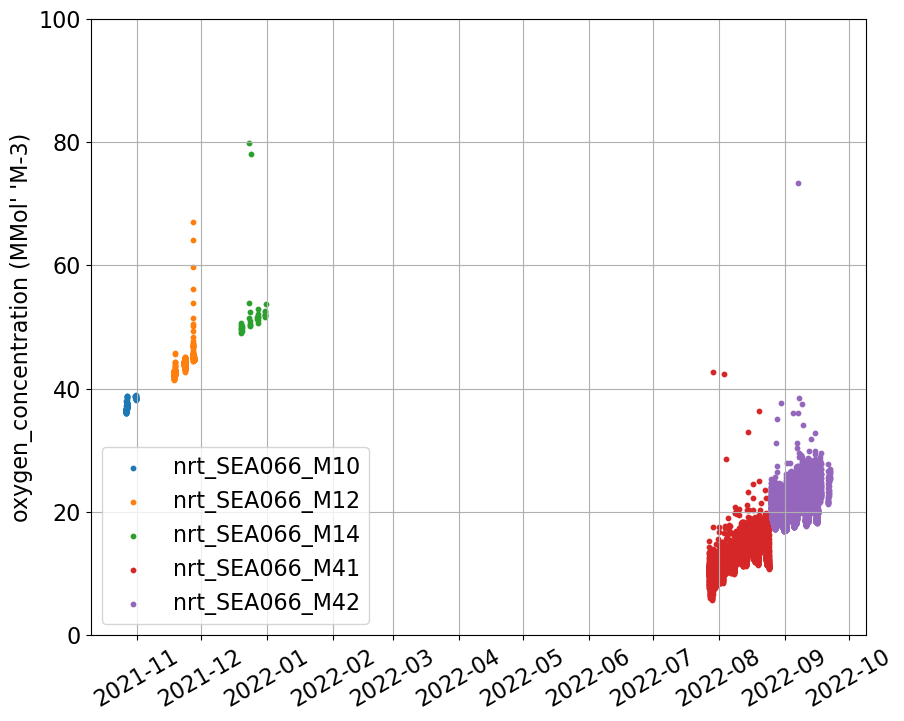

In [14]:
# Make a plot of the datasets
fig, ax = plt.subplots(figsize=(10, 8))
for name, ds in coda_datasets.items():
    ax.scatter(ds.time, ds.oxygen_concentration, label=name, s=10)
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=30);
ax.set(ylabel=f"{ds.oxygen_concentration.name} ({ds.oxygen_concentration.units})", ylim=(0, 100))
plt.grid()

# Expand this method

Here we repeat the above method for all of our oxygen optodes. This allows us to visually track sensor drift in time

In [15]:
# Find and print all unique oxygen optode serial numbers
serials = []
for dataset_id, meta in ds_meta.items():
    serials.append(meta["oxygen"]["serial"])
serials_uniq = list(set(serials))
serials_uniq.sort(reverse=True)
print(serials_uniq)

['210577', '210568', '206795', '206116', '206115', '205592', '0058', '0044', '0043', '0041', '0040', '0039', '0038']


  0%|          | 0/13 [00:00<?, ?it/s]

No datasets found for 0058


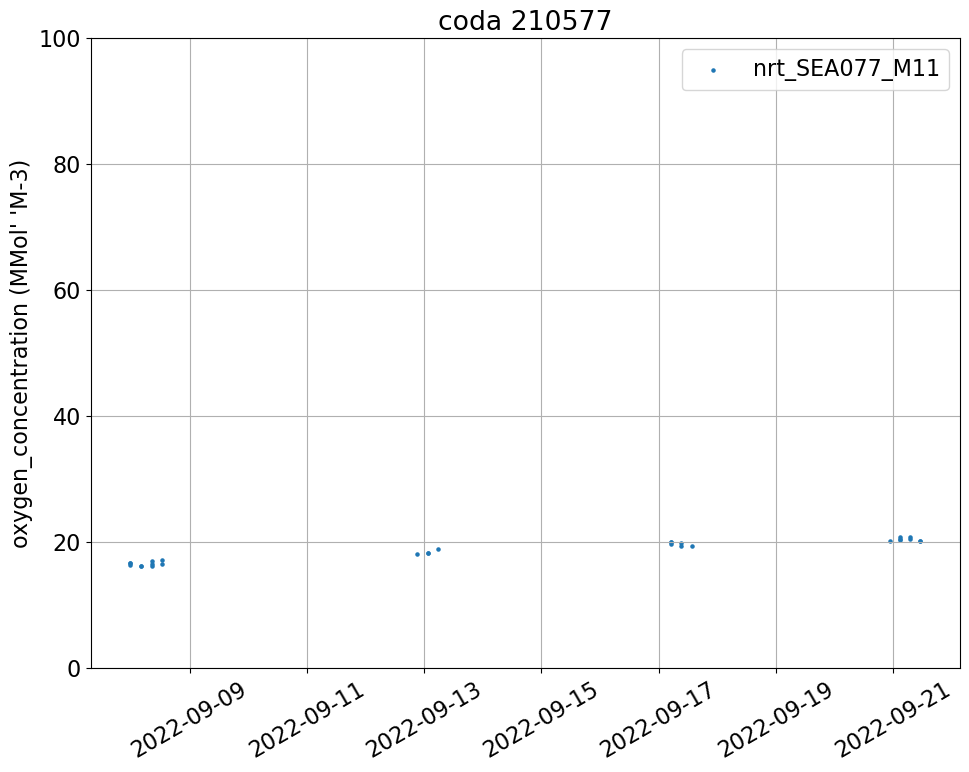

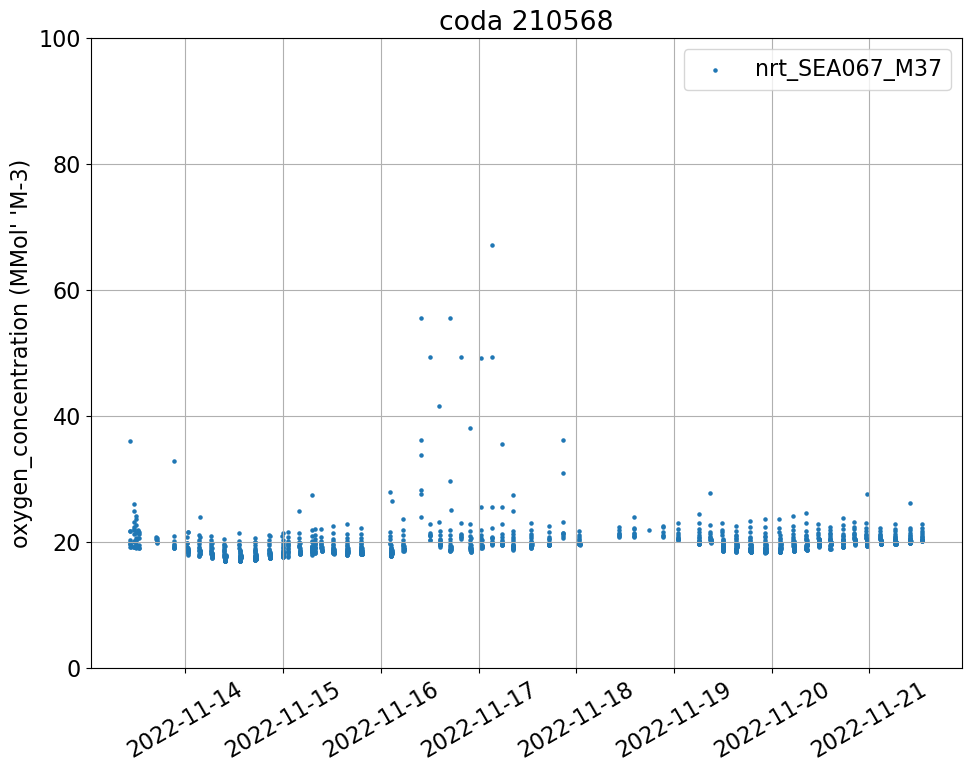

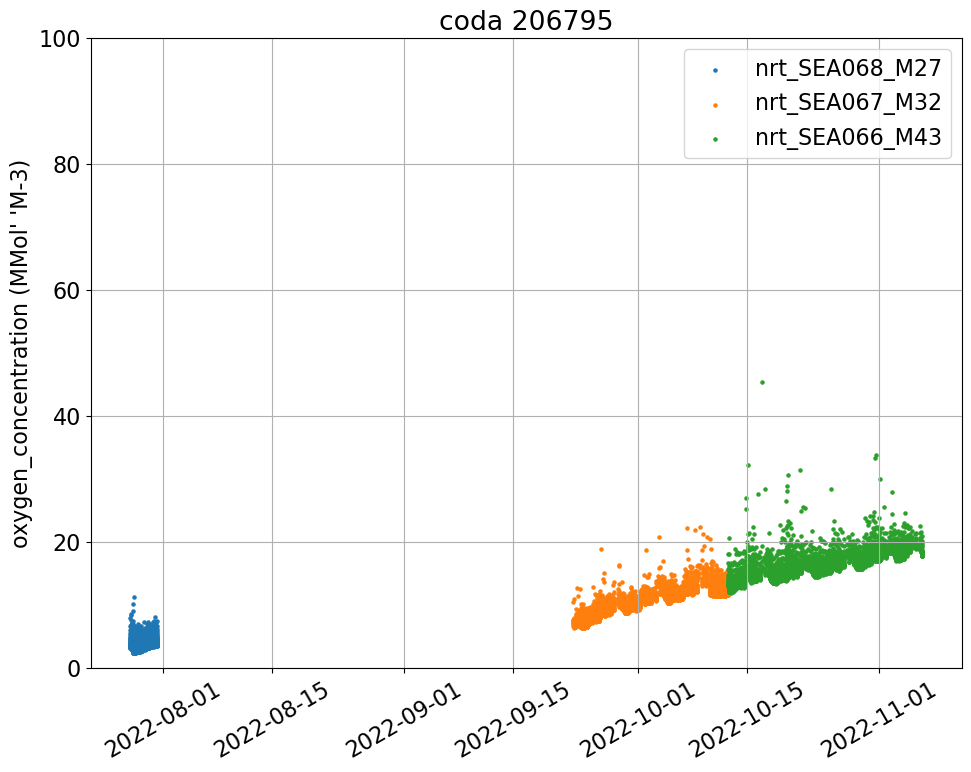

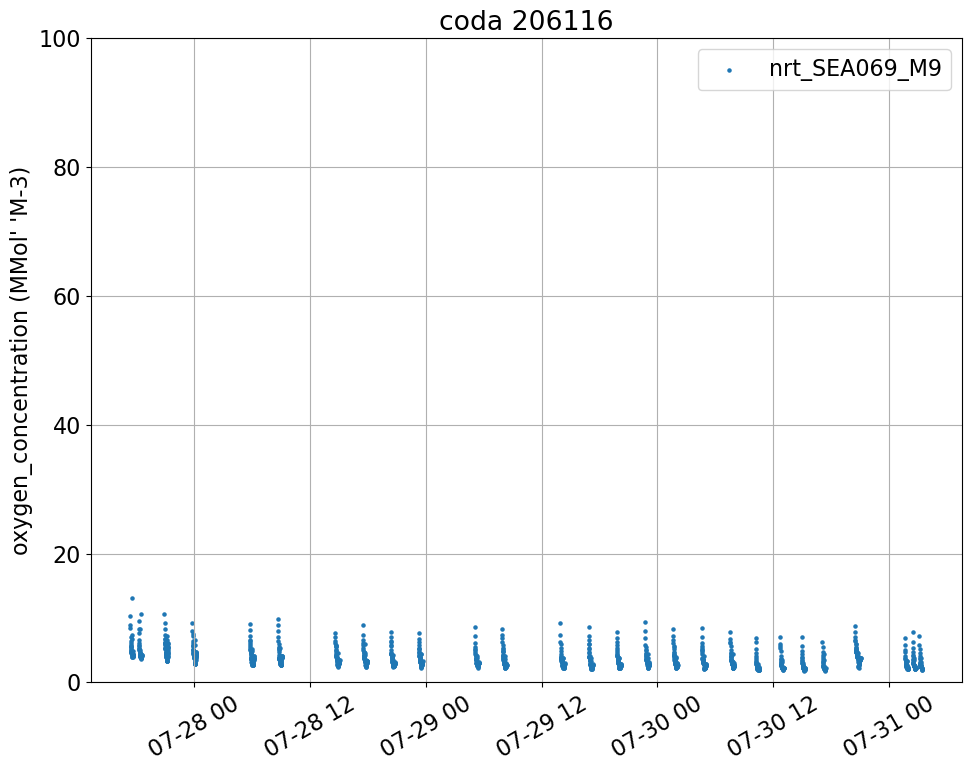

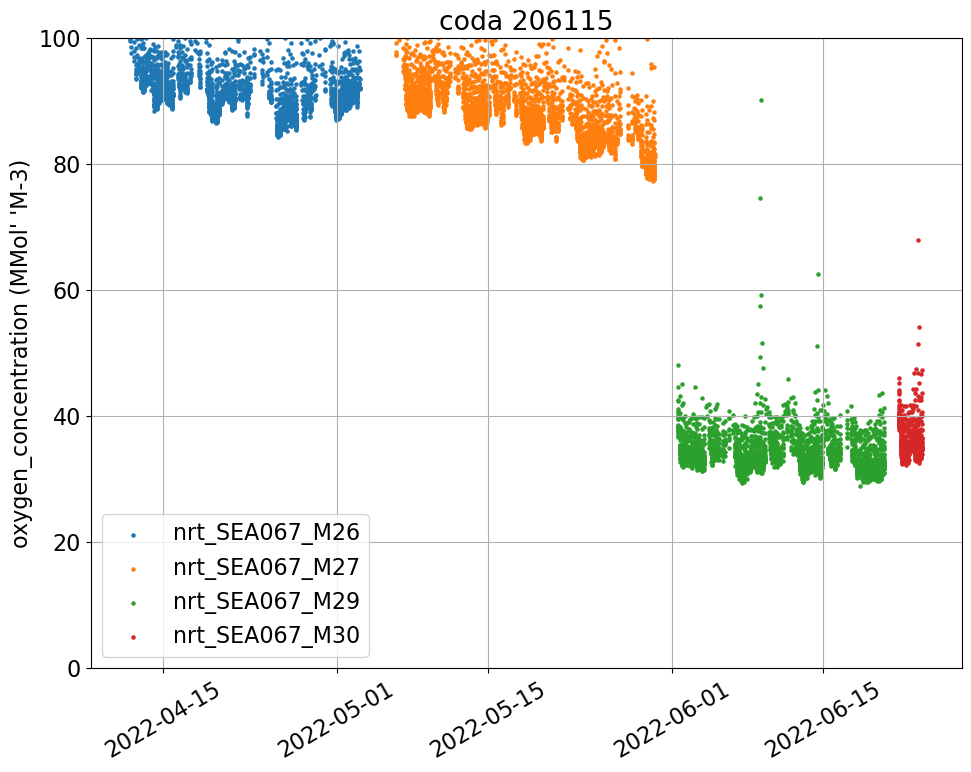

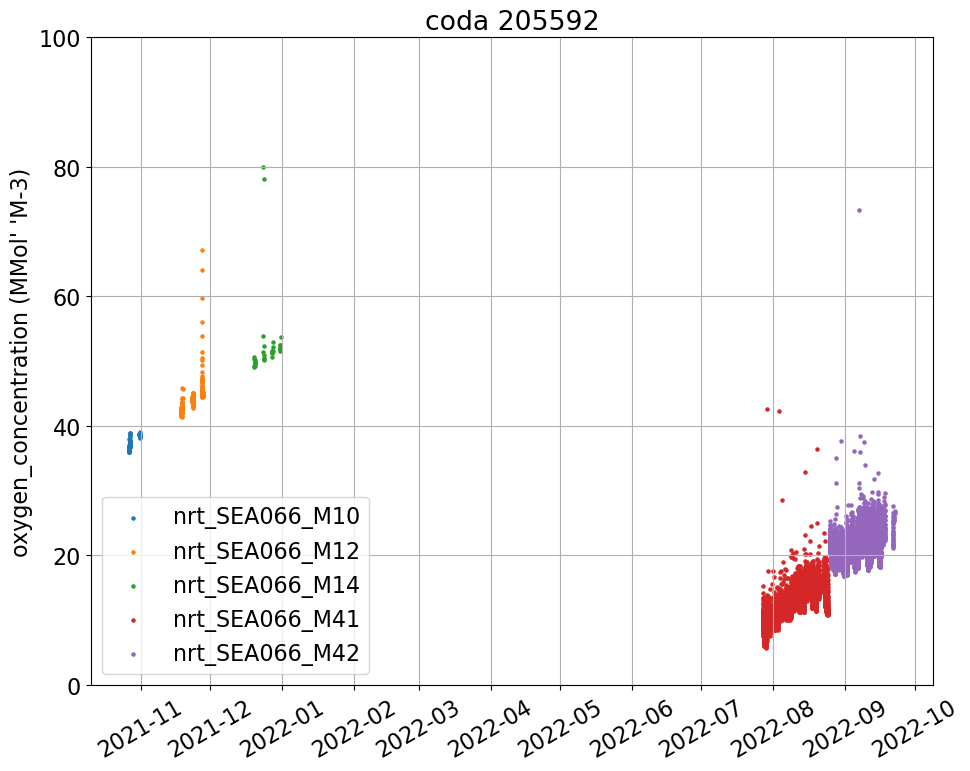

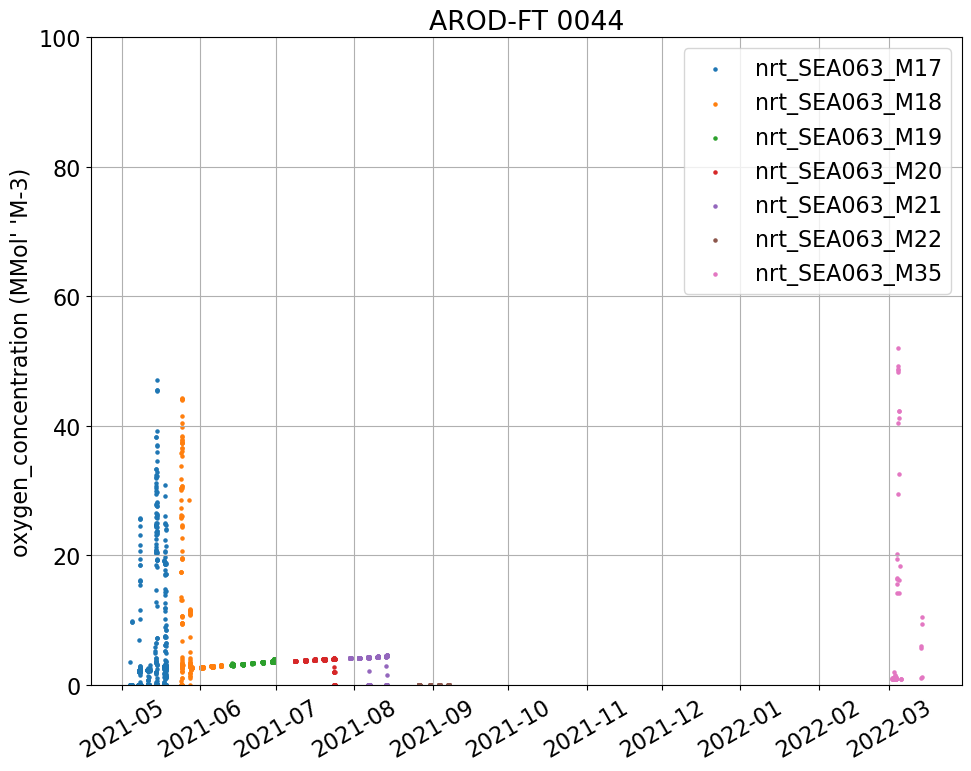

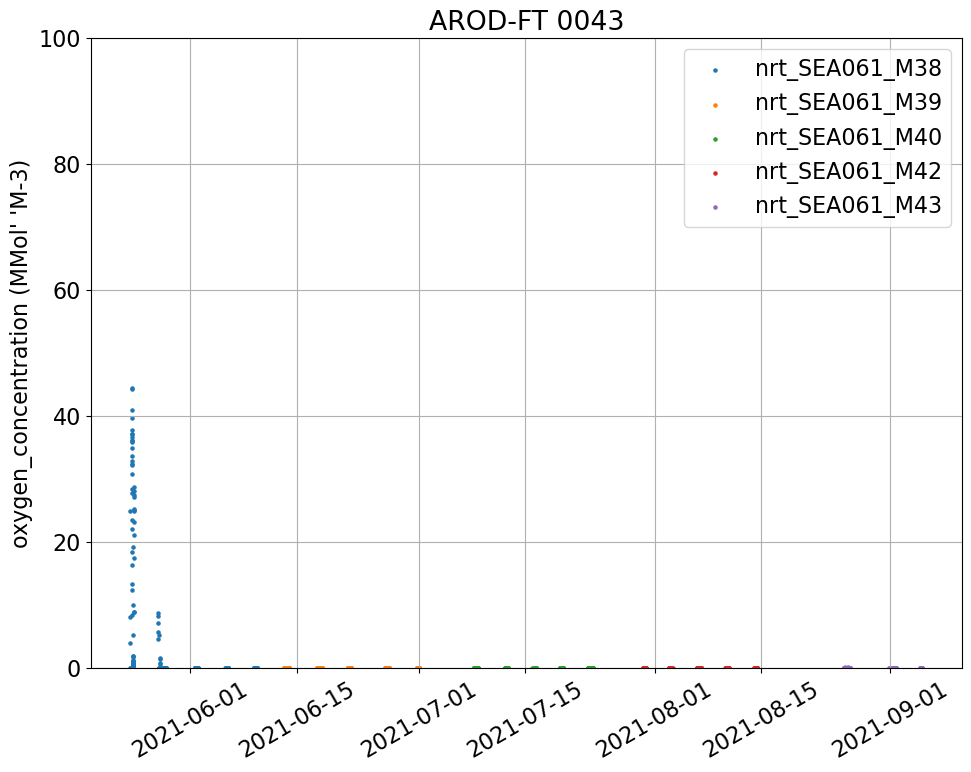

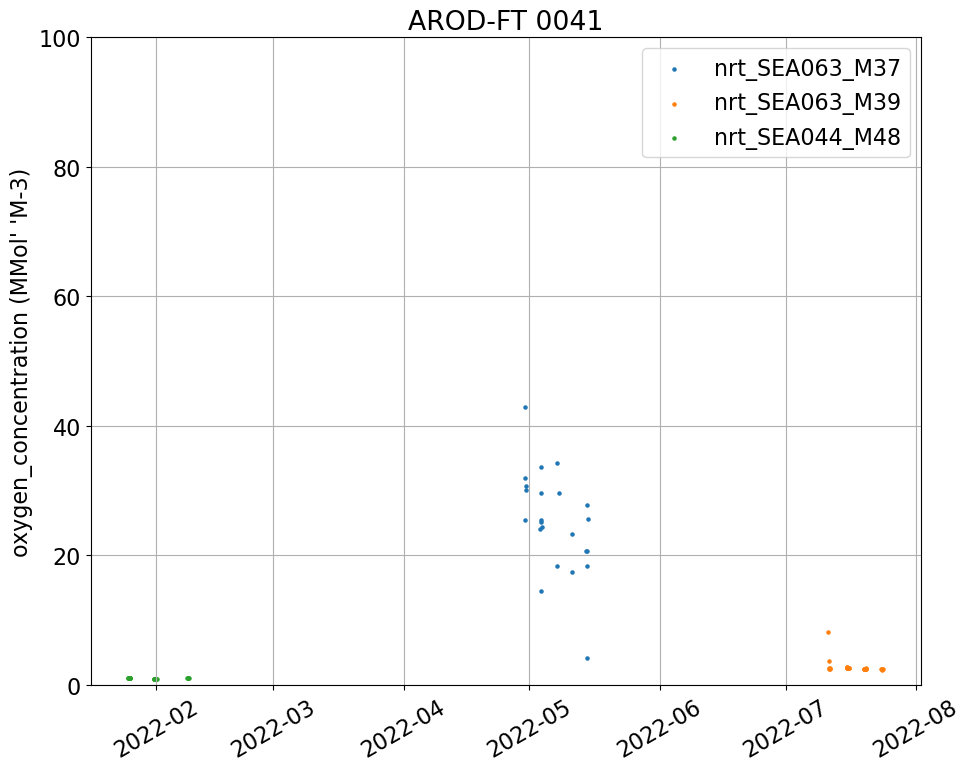

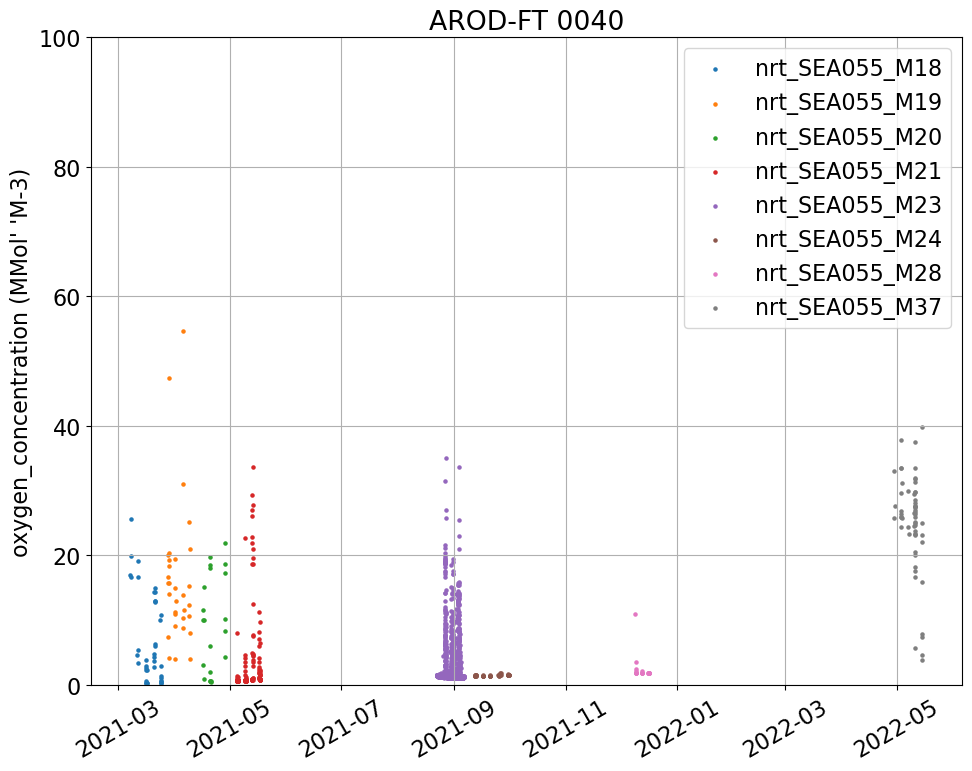

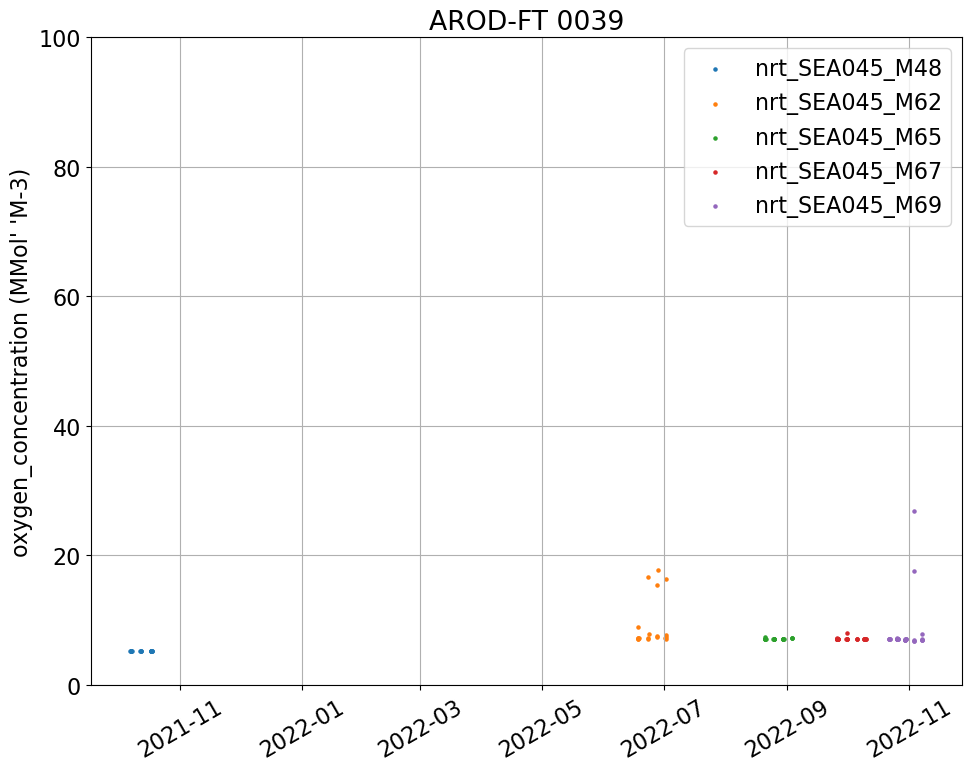

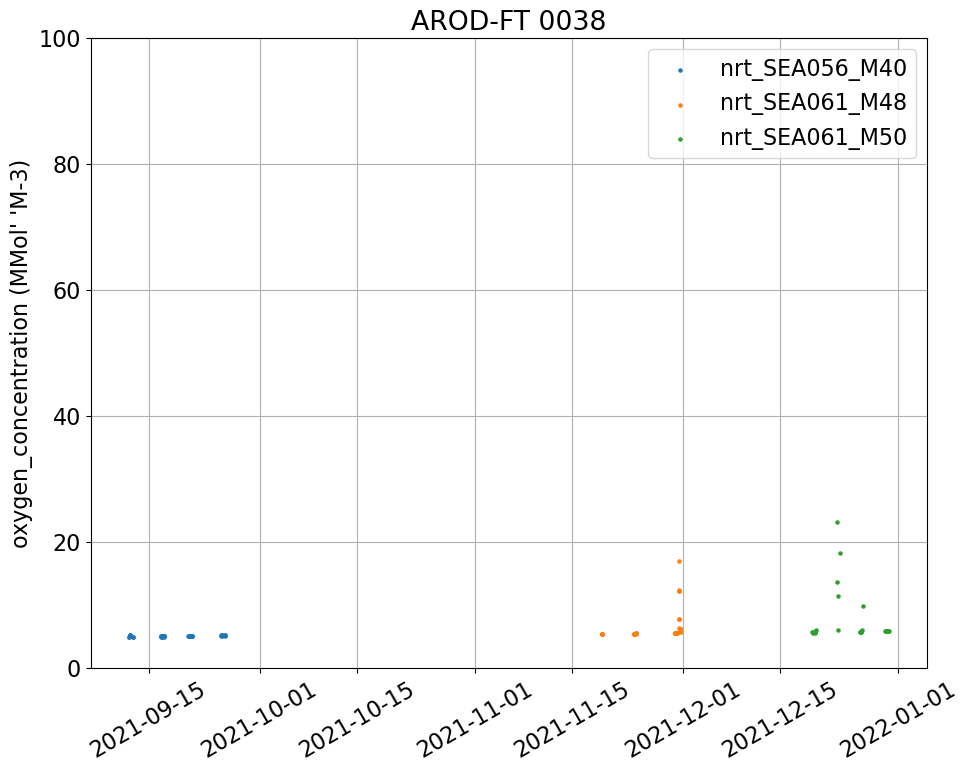

In [16]:
# Repeat the above test for all our optodes

for serial_no in tqdm(serials_uniq):
    coda_datasets = {}

    for dataset_id, meta in ds_meta.items():
        oxy = meta["oxygen"]
        if oxy["serial"] == serial_no:
            e.dataset_id = dataset_id
            try:
                ds = e.to_xarray()
                coda_datasets[dataset_id] = ds
            except:
                # no matching data in this dataset for these constraints
                continue
    if not coda_datasets:
        print(f"No datasets found for {serial_no}")
        continue
    fig, ax = plt.subplots(figsize=(10, 8))
    for dataset_id, ds in coda_datasets.items():
        oxy = ds_meta[dataset_id]["oxygen"]
        ax.scatter(ds.time, ds.oxygen_concentration, label=dataset_id, s=5)
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=30);
    title = f'{oxy["model"]} {oxy["serial"]}'
    ax.set(ylabel=f"{ds.oxygen_concentration.name} ({ds.oxygen_concentration.units})", ylim=(0, 100), title=title)
    plt.grid()
    plt.tight_layout()
    fig.savefig(f'figures/{oxy["model"]}_{oxy["serial"]}.png')